<a href="https://colab.research.google.com/github/jweir136/electrical_grid_stability/blob/master/electrical_grid_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

data = pd.read_csv("electrical_grid_stability.csv")

In [22]:
data.shape

(10000, 14)

In [23]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [72]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


In [24]:
data.isnull().any()

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

In [25]:
(data.isnull().sum() / len(data)) * 100

tau1     0.0
tau2     0.0
tau3     0.0
tau4     0.0
p1       0.0
p2       0.0
p3       0.0
p4       0.0
g1       0.0
g2       0.0
g3       0.0
g4       0.0
stab     0.0
stabf    0.0
dtype: float64

There are a few missing values, but they are so few, we are just going to drop them from the data.

In [0]:
data.dropna(inplace=True)

In [27]:
data.corr()['stab']

tau1    0.275761
tau2    0.290975
tau3    0.280700
tau4    0.278576
p1      0.010278
p2      0.006255
p3     -0.003321
p4     -0.020786
g1      0.282774
g2      0.293601
g3      0.308235
g4      0.279214
stab    1.000000
Name: stab, dtype: float64

Looks like none of the features have a very strong corrlation with the predictor.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff423333470>,
      dtype=object)

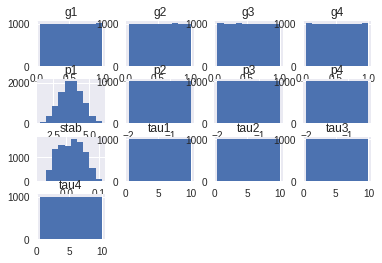

In [29]:
data.hist()

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return X[self.columns]

In [0]:
data['stabf'] = pd.get_dummies(data['stabf'])

In [0]:
preprocessing_pipe = FeatureUnion([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=1)),
])

pipe1 = Pipeline([
    ("pre", preprocessing_pipe),
    ("lr", LinearRegression())
])

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(['stab'], axis=1)
Y = data['stab']

trainX, testX, trainY, testY = train_test_split(X.values, Y.values, test_size=.2)

trainX = pd.DataFrame(trainX, columns=X.keys())
trainY = pd.DataFrame(trainY, columns=['stab'])

In [35]:
params = {
    "pre__poly__degree":[1,2,3,4]
}

grid = GridSearchCV(pipe1, params, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid.fit(trainX, trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.0002662200592001829, total=   0.1s
[CV] pre__poly__degree=1 .............................................
[CV] . pre__poly__degree=1, score=-0.000254862843016384, total=   0.0s
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.0002483294278876402, total=   0.0s
[CV] pre__poly__degree=1 .............................................
[CV]  pre__poly__degree=1, score=-0.0002441990796747187, total=   0.0s
[CV] pre__poly__degree=1 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  pre__poly__degree=1, score=-0.00025031656516550835, total=   0.0s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010682456539182021, total=   0.2s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-9.710666920633911e-05, total=   0.1s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010589180070548685, total=   0.1s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010101187485250407, total=   0.1s
[CV] pre__poly__degree=2 .............................................
[CV]  pre__poly__degree=2, score=-0.00010109626492031253, total=   0.1s
[CV] pre__poly__degree=3 .............................................
[CV]  pre__poly__degree=3, score=-5.612269931393575e-05, total=   0.8s
[CV] pre__poly__degree=3 .............................................
[

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pre', FeatureUnion(n_jobs=None,
       transformer_list=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False))],
       transformer_weights=None)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pre__poly__degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [36]:
grid.best_params_

{'pre__poly__degree': 4}

The data has a degree of 4!

In [0]:
import numpy as np

In [38]:
np.sqrt(-grid.best_score_)

0.00725083231232809

Not too bad of a score!

In [0]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

In [0]:
pipe2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel='poly', degree=4))
])

In [0]:
pipe3 = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

In [53]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True)
score1 = cross_val_score(pipe1, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error')
score2 = cross_val_score(pipe2, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error')
score3 = cross_val_score(pipe3, trainX, trainY, cv=kfold, scoring='neg_mean_squared_error')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [54]:
np.sqrt(-score1.mean())

0.01589329904240217

In [55]:
np.sqrt(-score2.mean())

0.03709616502321806

In [56]:
np.sqrt(-score3.mean())

0.015899663990776355

In [59]:
from sklearn.model_selection import learning_curve

train_sizes = [1,100,500,1000,3000,6400]

train_size, train_score, test_score = learning_curve(
  estimator=pipe1,
  X=trainX,
  y=trainY,
  cv=5,
  verbose=3,
  train_sizes=train_sizes,
  scoring='neg_mean_squared_error'
)

[learning_curve] Training set sizes: [   1  100  500 1000 3000 6400]
[CV]  ................................................................
[CV] ................... , score=-0.0033708877675857275, total=   0.0s
[CV]  ................................................................
[CV] .................. , score=-0.00029462115195744805, total=   0.0s
[CV]  ................................................................
[CV] ................... , score=-0.0002797056698721151, total=   0.0s
[CV]  ................................................................
[CV] ................... , score=-0.0002766899682717601, total=   0.0s
[CV]  ................................................................
[CV] .................. , score=-0.00026802269246422927, total=   0.0s
[CV]  ................................................................
[CV] ................... , score=-0.0002662200592001829, total=   0.0s
[CV]  ................................................................
[CV] ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... , score=-0.0002554953939144923, total=   0.0s
[CV]  ................................................................
[CV] .................... , score=-0.000254862843016384, total=   0.0s
[CV]  ................................................................
[CV] .................... , score=-0.001495482496754021, total=   0.0s
[CV]  ................................................................
[CV] ................... , score=-0.0002774341626891529, total=   0.0s
[CV]  ................................................................
[CV] .................. , score=-0.00025799391043817985, total=   0.0s
[CV]  ................................................................
[CV] .................. , score=-0.00025057458570684526, total=   0.0s
[CV]  ................................................................
[CV] ................... , score=-0.0002486584691495792, total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


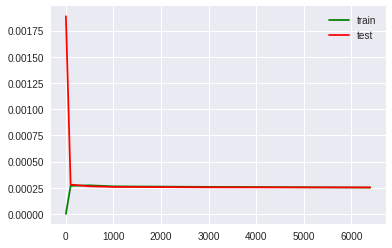

In [62]:
mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

plt.plot(train_size, mean_train, 'g-', label='train')
plt.plot(train_size, mean_test, 'r-', label='test')

plt.legend()

plt.show()

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

pipe1.fit(trainX, trainY)

print(r2_score(testY, pipe1.predict(testX)))

0.808628504280142


By the looks of the r2_score, and the learning curve, it looks like Linear Regression is underfitting the data.

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor()

rf.fit(trainX, trainY)
print(r2_score(testY, rf.predict(testX)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8984159994737264


In [79]:
train_size, train_score, test_score = learning_curve(
  estimator=RandomForestRegressor(),
  X=trainX,
  y=trainY,
  train_sizes=train_sizes,
  cv=5,
  scoring='neg_mean_squared_error'
)

mean_train = -train_score.mean(axis=1)
mean_test = -test_score.mean(axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

[]

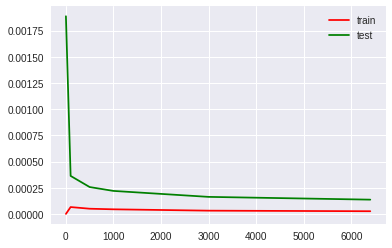

In [80]:
plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')

plt.legend()

plt.plot()

Looks like we could improve the biases of our model a bit.